## 08 캐글 산탄데르 고객 만족 예측

### 데이터 전처리

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('/Users/adam/Data_Analytics/Python/Datasets/santander/train_santander.csv', encoding = 'latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [10]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [12]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [13]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [14]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리.
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [15]:
# 학습 데이터와 테스트 데이터 세트 모두 비슷하게 추출됐는지 확인
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                   test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


### XGBoost 모델 학습과 하이퍼 파라미터 튜닝 

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators 500, random state는 예제 수행 시 동일 예측 결과 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc, 조기 중단 파라미터를 100으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
           eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4}'.format(xgb_roc_score))

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85831	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88238	validation_1-auc:0.84101
[17]	validation_0-auc:0.88354	validation_1-auc:0.84071
[18]	validation_0-au

In [19]:
# 컬럼 갯수가 많으므로 과적합 가능성을 가정한다.
# 학습 시간이 많이 필요한 ML모델인 경우 하이퍼파라미터 튜닝을 수행하는 요령은,
# 먼저 2~3개 정도의 파라미터를 결합해 최적 파라미터를 찾아낸 뒤
# 이 최적 파라미터를 기반으로 다시 1~2개 파라미터를 결합해 파라미터 튜닝을 수행하는 것이다.

In [21]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스느의 수행 속도를 향상 시키기 위해 n_estimators를 10으로 감소
xgb_clf = XGBClassifier(n_esimators=100)

params = {'max_depth':[5, 7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5, 0.75]}

# cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
          eval_set=[(X_train, y_train), (X_test, y_test)])

print('GidSearchCV 최적 파라미터:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:12:42] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.72220	validation_1-auc:0.72732
[1]	validation_0-auc:0.73513	validation_1-auc:0.73851
[2]	validation_0-auc:0.81328	validation_1-auc:0.81902
[3]	validation_0-auc:0.82198	validation_1-auc:0.82516
[4]	validation_0-auc:0.83082	validation_1-auc:0.83442
[5]	validation_0-auc:0.83232	validation_1-auc:0.83225
[6]	validation_0-auc:0.83027	validation_1-auc:0.83048
[7]	validation_0-auc:0.83946	validation_1-auc:0.83795
[8]	validation_0-auc:0.83789	validation_1-auc:0.83474
[9]	validation_0-auc:0.83574	validation_1-auc:0.83253
[10]	validation_0-auc:0.84507	validation_1-auc:0.83837
[11]	validation_0-auc:0.84854	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:12:44] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.70913	validation_1-auc:0.71991
[1]	validation_0-auc:0.73241	validation_1-auc:0.73977
[2]	validation_0-auc:0.81520	validation_1-auc:0.81881
[3]	validation_0-auc:0.82575	validation_1-auc:0.82698
[4]	validation_0-auc:0.83703	validation_1-auc:0.83613
[5]	validation_0-auc:0.84110	validation_1-auc:0.83536
[6]	validation_0-auc:0.83962	validation_1-auc:0.83714
[7]	validation_0-auc:0.84471	validation_1-auc:0.83745
[8]	validation_0-auc:0.84368	validation_1-auc:0.83491
[9]	validation_0-auc:0.84142	validation_1-auc:0.83409
[10]	validation_0-auc:0.84969	validation_1-auc:0.83703
[11]	validation_0-auc:0.85247	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:12:48] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.69700	validation_1-auc:0.70340
[1]	validation_0-auc:0.73289	validation_1-auc:0.73540
[2]	validation_0-auc:0.81670	validation_1-auc:0.81105
[3]	validation_0-auc:0.83054	validation_1-auc:0.82589
[4]	validation_0-auc:0.83677	validation_1-auc:0.82978
[5]	validation_0-auc:0.83828	validation_1-auc:0.83194
[6]	validation_0-auc:0.83828	validation_1-auc:0.83341
[7]	validation_0-auc:0.84263	validation_1-auc:0.83412
[8]	validation_0-auc:0.84237	validation_1-auc:0.83341
[9]	validation_0-auc:0.84232	validation_1-auc:0.83262
[10]	validation_0-auc:0.84968	validation_1-auc:0.83710
[11]	validation_0-auc:0.85327	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:12:51] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.72207	validation_1-auc:0.72723
[1]	validation_0-auc:0.73687	validation_1-auc:0.74013
[2]	validation_0-auc:0.81378	validation_1-auc:0.81961
[3]	validation_0-auc:0.82266	validation_1-auc:0.82451
[4]	validation_0-auc:0.83247	validation_1-auc:0.83372
[5]	validation_0-auc:0.83642	validation_1-auc:0.83544
[6]	validation_0-auc:0.83249	validation_1-auc:0.83077
[7]	validation_0-auc:0.84021	validation_1-auc:0.83770
[8]	validation_0-auc:0.83855	validation_1-auc:0.83418
[9]	validation_0-auc:0.83615	validation_1-auc:0.83134
[10]	validation_0-auc:0.84633	validation_1-auc:0.83740
[11]	validation_0-auc:0.84861	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:12:54] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.70841	validation_1-auc:0.71760
[1]	validation_0-auc:0.73166	validation_1-auc:0.73854
[2]	validation_0-auc:0.81662	validation_1-auc:0.81949
[3]	validation_0-auc:0.82754	validation_1-auc:0.82903
[4]	validation_0-auc:0.83738	validation_1-auc:0.83775
[5]	validation_0-auc:0.84076	validation_1-auc:0.83761
[6]	validation_0-auc:0.83902	validation_1-auc:0.83812
[7]	validation_0-auc:0.84368	validation_1-auc:0.83885
[8]	validation_0-auc:0.84266	validation_1-auc:0.83606
[9]	validation_0-auc:0.84082	validation_1-auc:0.83433
[10]	validation_0-auc:0.84810	validation_1-auc:0.83832
[11]	validation_0-auc:0.85093	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:12:56] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.70992	validation_1-auc:0.71425
[1]	validation_0-auc:0.74018	validation_1-auc:0.73974
[2]	validation_0-auc:0.81489	validation_1-auc:0.81252
[3]	validation_0-auc:0.82851	validation_1-auc:0.82628
[4]	validation_0-auc:0.83564	validation_1-auc:0.83172
[5]	validation_0-auc:0.83740	validation_1-auc:0.83199
[6]	validation_0-auc:0.83723	validation_1-auc:0.83230
[7]	validation_0-auc:0.84310	validation_1-auc:0.83347
[8]	validation_0-auc:0.84279	validation_1-auc:0.83244
[9]	validation_0-auc:0.84028	validation_1-auc:0.83096
[10]	validation_0-auc:0.84741	validation_1-auc:0.83810
[11]	validation_0-auc:0.85115	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:12:59] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.72439	validation_1-auc:0.72737
[1]	validation_0-auc:0.73938	validation_1-auc:0.73942
[2]	validation_0-auc:0.81562	validation_1-auc:0.81645
[3]	validation_0-auc:0.83036	validation_1-auc:0.82345
[4]	validation_0-auc:0.84019	validation_1-auc:0.83140
[5]	validation_0-auc:0.84594	validation_1-auc:0.83409
[6]	validation_0-auc:0.84543	validation_1-auc:0.82949
[7]	validation_0-auc:0.85446	validation_1-auc:0.83333
[8]	validation_0-auc:0.85328	validation_1-auc:0.83011
[9]	validation_0-auc:0.85138	validation_1-auc:0.82921
[10]	validation_0-auc:0.85948	validation_1-auc:0.83570
[11]	validation_0-auc:0.86519	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:13:02] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.71077	validation_1-auc:0.71902
[1]	validation_0-auc:0.73577	validation_1-auc:0.74042
[2]	validation_0-auc:0.82095	validation_1-auc:0.81861
[3]	validation_0-auc:0.83815	validation_1-auc:0.83096
[4]	validation_0-auc:0.84642	validation_1-auc:0.83655
[5]	validation_0-auc:0.85196	validation_1-auc:0.83716
[6]	validation_0-auc:0.85104	validation_1-auc:0.83579
[7]	validation_0-auc:0.85877	validation_1-auc:0.83711
[8]	validation_0-auc:0.85806	validation_1-auc:0.83593
[9]	validation_0-auc:0.85826	validation_1-auc:0.83425
[10]	validation_0-auc:0.86523	validation_1-auc:0.83838
[11]	validation_0-auc:0.86994	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:13:06] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.70992	validation_1-auc:0.71081
[1]	validation_0-auc:0.74404	validation_1-auc:0.74272
[2]	validation_0-auc:0.82017	validation_1-auc:0.81563
[3]	validation_0-auc:0.83551	validation_1-auc:0.82595
[4]	validation_0-auc:0.84346	validation_1-auc:0.83063
[5]	validation_0-auc:0.84771	validation_1-auc:0.83389
[6]	validation_0-auc:0.84758	validation_1-auc:0.83100
[7]	validation_0-auc:0.85390	validation_1-auc:0.83135
[8]	validation_0-auc:0.85559	validation_1-auc:0.82946
[9]	validation_0-auc:0.85545	validation_1-auc:0.82562
[10]	validation_0-auc:0.86350	validation_1-auc:0.83294
[11]	validation_0-auc:0.86895	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:13:09] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.72375	validation_1-auc:0.72754
[1]	validation_0-auc:0.74058	validation_1-auc:0.73969
[2]	validation_0-auc:0.81581	validation_1-auc:0.81555
[3]	validation_0-auc:0.83176	validation_1-auc:0.82812
[4]	validation_0-auc:0.84028	validation_1-auc:0.83576
[5]	validation_0-auc:0.84506	validation_1-auc:0.83679
[6]	validation_0-auc:0.84401	validation_1-auc:0.83358
[7]	validation_0-auc:0.85267	validation_1-auc:0.83734
[8]	validation_0-auc:0.85146	validation_1-auc:0.83318
[9]	validation_0-auc:0.84991	validation_1-auc:0.83115
[10]	validation_0-auc:0.85726	validation_1-auc:0.83630
[11]	validation_0-auc:0.86184	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:13:13] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.71171	validation_1-auc:0.71788
[1]	validation_0-auc:0.73693	validation_1-auc:0.74138
[2]	validation_0-auc:0.82320	validation_1-auc:0.82077
[3]	validation_0-auc:0.83940	validation_1-auc:0.83067
[4]	validation_0-auc:0.84688	validation_1-auc:0.83553
[5]	validation_0-auc:0.85056	validation_1-auc:0.83589
[6]	validation_0-auc:0.84834	validation_1-auc:0.83450
[7]	validation_0-auc:0.85583	validation_1-auc:0.83715
[8]	validation_0-auc:0.85399	validation_1-auc:0.83463
[9]	validation_0-auc:0.85359	validation_1-auc:0.83333
[10]	validation_0-auc:0.86138	validation_1-auc:0.83687
[11]	validation_0-auc:0.86598	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:13:16] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.71011	validation_1-auc:0.71403
[1]	validation_0-auc:0.75547	validation_1-auc:0.74961
[2]	validation_0-auc:0.82389	validation_1-auc:0.81445
[3]	validation_0-auc:0.83566	validation_1-auc:0.82347
[4]	validation_0-auc:0.84510	validation_1-auc:0.83167
[5]	validation_0-auc:0.84834	validation_1-auc:0.83303
[6]	validation_0-auc:0.84827	validation_1-auc:0.83088
[7]	validation_0-auc:0.85514	validation_1-auc:0.83281
[8]	validation_0-auc:0.85516	validation_1-auc:0.82924
[9]	validation_0-auc:0.85480	validation_1-auc:0.82766
[10]	validation_0-auc:0.86184	validation_1-auc:0.83311
[11]	validation_0-auc:0.86466	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:13:20] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.72072	validation_1-auc:0.72578
[1]	validation_0-auc:0.73625	validation_1-auc:0.73868
[2]	validation_0-auc:0.80301	validation_1-auc:0.80850
[3]	validation_0-auc:0.82118	validation_1-auc:0.82180
[4]	validation_0-auc:0.83338	validation_1-auc:0.82992
[5]	validation_0-auc:0.83903	validation_1-auc:0.83331
[6]	validation_0-auc:0.83583	validation_1-auc:0.82833
[7]	validation_0-auc:0.84173	validation_1-auc:0.83340
[8]	validation_0-auc:0.84256	validation_1-auc:0.83295
[9]	validation_0-auc:0.84181	validation_1-auc:0.82992
[10]	validation_0-auc:0.84915	validation_1-auc:0.83522
[11]	validation_0-auc:0.85258	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:13:23] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.72766	validation_1-auc:0.73437
[1]	validation_0-auc:0.74617	validation_1-auc:0.75059
[2]	validation_0-auc:0.81052	validation_1-auc:0.81275
[3]	validation_0-auc:0.82734	validation_1-auc:0.82913
[4]	validation_0-auc:0.83657	validation_1-auc:0.83309
[5]	validation_0-auc:0.84226	validation_1-auc:0.83513
[6]	validation_0-auc:0.84054	validation_1-auc:0.83361
[7]	validation_0-auc:0.84642	validation_1-auc:0.83655
[8]	validation_0-auc:0.84641	validation_1-auc:0.83613
[9]	validation_0-auc:0.84520	validation_1-auc:0.83550
[10]	validation_0-auc:0.85249	validation_1-auc:0.83822
[11]	validation_0-auc:0.85493	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:13:27] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.72262	validation_1-auc:0.72749
[1]	validation_0-auc:0.74619	validation_1-auc:0.74779
[2]	validation_0-auc:0.81650	validation_1-auc:0.81803
[3]	validation_0-auc:0.82850	validation_1-auc:0.82607
[4]	validation_0-auc:0.83527	validation_1-auc:0.82811
[5]	validation_0-auc:0.84220	validation_1-auc:0.83298
[6]	validation_0-auc:0.84159	validation_1-auc:0.83035
[7]	validation_0-auc:0.84653	validation_1-auc:0.83289
[8]	validation_0-auc:0.84557	validation_1-auc:0.83107
[9]	validation_0-auc:0.84423	validation_1-auc:0.83035
[10]	validation_0-auc:0.85170	validation_1-auc:0.83529
[11]	validation_0-auc:0.85533	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:13:31] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.72324	validation_1-auc:0.72891
[1]	validation_0-auc:0.74133	validation_1-auc:0.74360
[2]	validation_0-auc:0.80929	validation_1-auc:0.81326
[3]	validation_0-auc:0.82201	validation_1-auc:0.82381
[4]	validation_0-auc:0.83305	validation_1-auc:0.83097
[5]	validation_0-auc:0.83852	validation_1-auc:0.83373
[6]	validation_0-auc:0.83739	validation_1-auc:0.83013
[7]	validation_0-auc:0.84380	validation_1-auc:0.83406
[8]	validation_0-auc:0.84261	validation_1-auc:0.83027
[9]	validation_0-auc:0.84166	validation_1-auc:0.82781
[10]	validation_0-auc:0.84924	validation_1-auc:0.83315
[11]	validation_0-auc:0.85290	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:13:35] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.73583	validation_1-auc:0.74158
[1]	validation_0-auc:0.75273	validation_1-auc:0.75777
[2]	validation_0-auc:0.81897	validation_1-auc:0.82024
[3]	validation_0-auc:0.82997	validation_1-auc:0.83286
[4]	validation_0-auc:0.83780	validation_1-auc:0.83711
[5]	validation_0-auc:0.84305	validation_1-auc:0.83876
[6]	validation_0-auc:0.84122	validation_1-auc:0.83552
[7]	validation_0-auc:0.84718	validation_1-auc:0.83650
[8]	validation_0-auc:0.84497	validation_1-auc:0.83644
[9]	validation_0-auc:0.84337	validation_1-auc:0.83614
[10]	validation_0-auc:0.84957	validation_1-auc:0.83961
[11]	validation_0-auc:0.85361	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:13:38] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.72717	validation_1-auc:0.72586
[1]	validation_0-auc:0.75162	validation_1-auc:0.74899
[2]	validation_0-auc:0.81727	validation_1-auc:0.81174
[3]	validation_0-auc:0.82960	validation_1-auc:0.82681
[4]	validation_0-auc:0.83661	validation_1-auc:0.82957
[5]	validation_0-auc:0.84084	validation_1-auc:0.83400
[6]	validation_0-auc:0.83919	validation_1-auc:0.83035
[7]	validation_0-auc:0.84441	validation_1-auc:0.83275
[8]	validation_0-auc:0.84412	validation_1-auc:0.83236
[9]	validation_0-auc:0.84254	validation_1-auc:0.83042
[10]	validation_0-auc:0.84938	validation_1-auc:0.83476
[11]	validation_0-auc:0.85279	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:13:43] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.72503	validation_1-auc:0.72900
[1]	validation_0-auc:0.74102	validation_1-auc:0.74215
[2]	validation_0-auc:0.81290	validation_1-auc:0.81210
[3]	validation_0-auc:0.83255	validation_1-auc:0.82562
[4]	validation_0-auc:0.84116	validation_1-auc:0.83193
[5]	validation_0-auc:0.84825	validation_1-auc:0.83519
[6]	validation_0-auc:0.84848	validation_1-auc:0.83044
[7]	validation_0-auc:0.85640	validation_1-auc:0.83540
[8]	validation_0-auc:0.85547	validation_1-auc:0.83215
[9]	validation_0-auc:0.85644	validation_1-auc:0.83108
[10]	validation_0-auc:0.86322	validation_1-auc:0.83489
[11]	validation_0-auc:0.86907	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:13:47] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.74226	validation_1-auc:0.74184
[1]	validation_0-auc:0.76547	validation_1-auc:0.76114
[2]	validation_0-auc:0.82744	validation_1-auc:0.81840
[3]	validation_0-auc:0.84210	validation_1-auc:0.83304
[4]	validation_0-auc:0.84930	validation_1-auc:0.83931
[5]	validation_0-auc:0.85606	validation_1-auc:0.83771
[6]	validation_0-auc:0.85467	validation_1-auc:0.83295
[7]	validation_0-auc:0.86053	validation_1-auc:0.83523
[8]	validation_0-auc:0.86072	validation_1-auc:0.83296
[9]	validation_0-auc:0.86087	validation_1-auc:0.83147
[10]	validation_0-auc:0.86853	validation_1-auc:0.83601
[11]	validation_0-auc:0.87381	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:13:51] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.73604	validation_1-auc:0.73972
[1]	validation_0-auc:0.75848	validation_1-auc:0.75428
[2]	validation_0-auc:0.82656	validation_1-auc:0.81871
[3]	validation_0-auc:0.83765	validation_1-auc:0.82732
[4]	validation_0-auc:0.84640	validation_1-auc:0.83244
[5]	validation_0-auc:0.85291	validation_1-auc:0.83518
[6]	validation_0-auc:0.85386	validation_1-auc:0.83215
[7]	validation_0-auc:0.86053	validation_1-auc:0.83299
[8]	validation_0-auc:0.85996	validation_1-auc:0.83277
[9]	validation_0-auc:0.86067	validation_1-auc:0.83176
[10]	validation_0-auc:0.86832	validation_1-auc:0.83433
[11]	validation_0-auc:0.87277	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:13:56] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.72638	validation_1-auc:0.73234
[1]	validation_0-auc:0.74242	validation_1-auc:0.74574
[2]	validation_0-auc:0.81532	validation_1-auc:0.81601
[3]	validation_0-auc:0.83283	validation_1-auc:0.82810
[4]	validation_0-auc:0.84332	validation_1-auc:0.83575
[5]	validation_0-auc:0.84938	validation_1-auc:0.83907
[6]	validation_0-auc:0.84894	validation_1-auc:0.83272
[7]	validation_0-auc:0.85535	validation_1-auc:0.83596
[8]	validation_0-auc:0.85467	validation_1-auc:0.83443
[9]	validation_0-auc:0.85415	validation_1-auc:0.83202
[10]	validation_0-auc:0.86121	validation_1-auc:0.83453
[11]	validation_0-auc:0.86636	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:13:59] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.74200	validation_1-auc:0.74116
[1]	validation_0-auc:0.75955	validation_1-auc:0.75707
[2]	validation_0-auc:0.82727	validation_1-auc:0.82101
[3]	validation_0-auc:0.84050	validation_1-auc:0.83482
[4]	validation_0-auc:0.84695	validation_1-auc:0.83888
[5]	validation_0-auc:0.85271	validation_1-auc:0.83928
[6]	validation_0-auc:0.85198	validation_1-auc:0.83294
[7]	validation_0-auc:0.85779	validation_1-auc:0.83469
[8]	validation_0-auc:0.85641	validation_1-auc:0.83597
[9]	validation_0-auc:0.85468	validation_1-auc:0.83162
[10]	validation_0-auc:0.86324	validation_1-auc:0.83527
[11]	validation_0-auc:0.86786	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[16:14:04] WARNING: ../src/learner.cc:576: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.74303	validation_1-auc:0.74424
[1]	validation_0-auc:0.77101	validation_1-auc:0.76843
[2]	validation_0-auc:0.82663	validation_1-auc:0.81971
[3]	validation_0-auc:0.84132	validation_1-auc:0.82740
[4]	validation_0-auc:0.84968	validation_1-auc:0.83392
[5]	validation_0-auc:0.85221	validation_1-auc:0.83473
[6]	validation_0-auc:0.85279	validation_1-auc:0.83000
[7]	validation_0-auc:0.85844	validation_1-auc:0.83304
[8]	validation_0-auc:0.85742	validation_1-auc:0.82944
[9]	validation_0-auc:0.85781	validation_1-auc:0.82745
[10]	validation_0-auc:0.86438	validation_1-auc:0.83293
[11]	validation_0-auc:0.86867	validation_1-

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[0]	validation_0-auc:0.72191	validation_1-auc:0.72954
[1]	validation_0-auc:0.75536	validation_1-auc:0.75461
[2]	validation_0-auc:0.82761	validation_1-auc:0.82039
[3]	validation_0-auc:0.84343	validation_1-auc:0.83066
[4]	validation_0-auc:0.85255	validation_1-auc:0.83696
[5]	validation_0-auc:0.85720	validation_1-auc:0.83561
[6]	validation_0-auc:0.85675	validation_1-auc:0.83301
[7]	validation_0-auc:0.86477	validation_1-auc:0.83483
[8]	validation_0-auc:0.86438	validation_1-auc:0.83213
[9]	validation_0-auc:0.86357	validation_1-auc:0.83235
[10]	validation_0-auc:0.87038	validation_1-auc:0.83889
[11]	validation_0-auc:0.87397	validation_1-auc:0.84047
[12]	validation_0-auc:0.87609	validation_1-auc:0.84225
[13]	validation_0-auc:0.87766	validation_1-auc:0.84222
[14]	validation_0-auc:0.87922	validation_1-auc:0.84231
[15]	validation_0-auc:0.88155	validation_1-auc:0.84270
[16]	validation_0-auc:0.88192	validation_1-auc:0.84165
[17]	validation_0-auc:0.88298	validation_1-auc:0.84300
[18]	validation_0-au

In [22]:
# 앞에서 구한 최적화 하이퍼 파라미터를 기반으로 다른 하이퍼 파라미터를 변경 또는 추가해
# 다시 최적화 진행

In [24]:
# n_estimators는 1000으로 증가 시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로  추가함.
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,
                       min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# 성능 평가 지표를 auc로, 조기 중단 파라미터 값은 200으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200,
           eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/adam/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.

[0]	validation_0-auc:0.75494	validation_1-auc:0.75869
[1]	validation_0-auc:0.81631	validation_1-auc:0.81861
[2]	validation_0-auc:0.83238	validation_1-auc:0.82547
[3]	validation_0-auc:0.83570	validation_1-auc:0.82720
[4]	validation_0-auc:0.83704	validation_1-auc:0.82693
[5]	validation_0-auc:0.83875	validation_1-auc:0.82952
[6]	validation_0-auc:0.83841	validation_1-auc:0.82939
[7]	validation_0-auc:0.83721	validation_1-auc:0.82850
[8]	validation_0-auc:0.83838	validation_1-auc:0.82907
[9]	validation_0-auc:0.83992	validation_1-auc:0.83026
[10]	validation_0-auc:0.84061	validation_1-auc:0.83057
[11]	validation_0-auc:0.84108	validation_1-auc:0.83074
[12]	validation_0-auc:0.84112	validation_1-auc:0.83051
[13]	validation_0-auc:0.84200	validation_1-auc:0.83016
[14]	validation_0-auc:0.84327	validation_1-auc:0.83179
[15]	validation_0-auc:0.84261	validation_1-auc:0.83057
[16]	validation_0-auc:0.84280	validation_1-auc:0.83029
[17]	validation_0-auc:0.84477	validation_1-auc:0.83381
[18]	validation_0-au

[149]	validation_0-auc:0.88001	validation_1-auc:0.84427
[150]	validation_0-auc:0.88008	validation_1-auc:0.84423
[151]	validation_0-auc:0.88024	validation_1-auc:0.84439
[152]	validation_0-auc:0.88056	validation_1-auc:0.84440
[153]	validation_0-auc:0.88086	validation_1-auc:0.84454
[154]	validation_0-auc:0.88102	validation_1-auc:0.84465
[155]	validation_0-auc:0.88127	validation_1-auc:0.84468
[156]	validation_0-auc:0.88156	validation_1-auc:0.84487
[157]	validation_0-auc:0.88167	validation_1-auc:0.84482
[158]	validation_0-auc:0.88195	validation_1-auc:0.84486
[159]	validation_0-auc:0.88214	validation_1-auc:0.84496
[160]	validation_0-auc:0.88225	validation_1-auc:0.84475
[161]	validation_0-auc:0.88249	validation_1-auc:0.84500
[162]	validation_0-auc:0.88253	validation_1-auc:0.84501
[163]	validation_0-auc:0.88279	validation_1-auc:0.84503
[164]	validation_0-auc:0.88310	validation_1-auc:0.84514
[165]	validation_0-auc:0.88316	validation_1-auc:0.84505
[166]	validation_0-auc:0.88328	validation_1-auc:

[296]	validation_0-auc:0.90419	validation_1-auc:0.84467
[297]	validation_0-auc:0.90427	validation_1-auc:0.84468
[298]	validation_0-auc:0.90431	validation_1-auc:0.84465
[299]	validation_0-auc:0.90443	validation_1-auc:0.84461
[300]	validation_0-auc:0.90450	validation_1-auc:0.84457
[301]	validation_0-auc:0.90451	validation_1-auc:0.84458
[302]	validation_0-auc:0.90460	validation_1-auc:0.84459
[303]	validation_0-auc:0.90464	validation_1-auc:0.84457
[304]	validation_0-auc:0.90473	validation_1-auc:0.84445
[305]	validation_0-auc:0.90489	validation_1-auc:0.84440
[306]	validation_0-auc:0.90494	validation_1-auc:0.84444
[307]	validation_0-auc:0.90499	validation_1-auc:0.84441
[308]	validation_0-auc:0.90519	validation_1-auc:0.84443
[309]	validation_0-auc:0.90524	validation_1-auc:0.84439
[310]	validation_0-auc:0.90529	validation_1-auc:0.84436
[311]	validation_0-auc:0.90537	validation_1-auc:0.84439
[312]	validation_0-auc:0.90558	validation_1-auc:0.84439
[313]	validation_0-auc:0.90562	validation_1-auc:

In [25]:
# XGBoost가 GBM 보다는 빠르지만 GBM을 기반으로 하고 있기 떄문에 수행 시간이 상당히 더 많이 요구 된다.
# 앙상블 계열 알고리즘에서 하이퍼 파라미터 튜닝으로 성능 수치 개선이 급격히 늘어가는 경우는 많지 않다.
# 앙상블 계열 알고리즘은 과적합이나 잡음에 기본적으로 뛰언나 알고리즘이기 때문이다.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

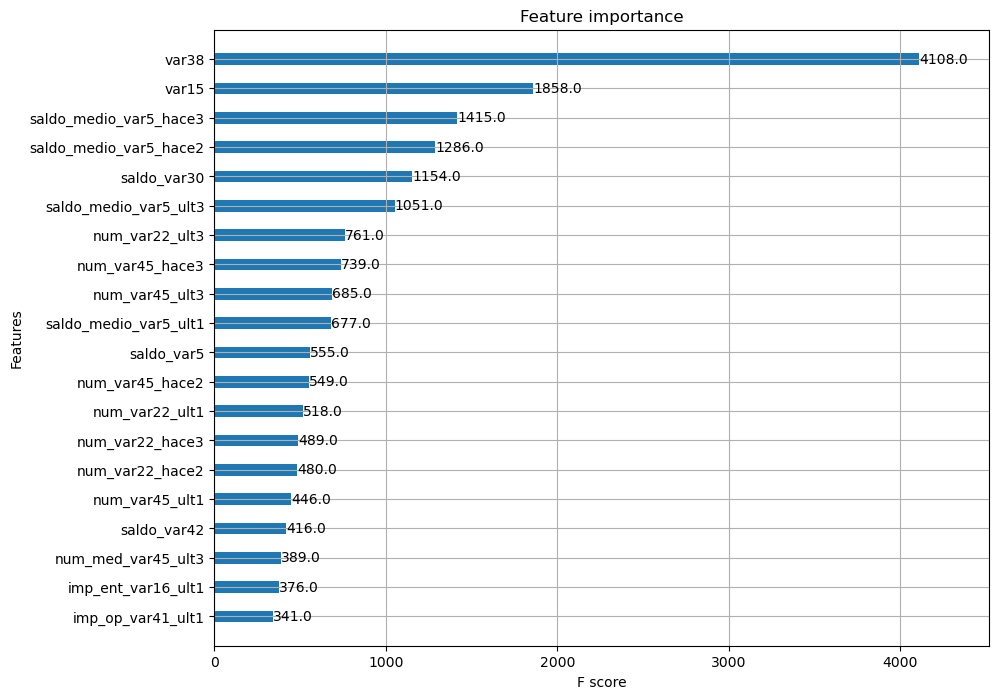

In [26]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝 

In [30]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_logloss: 0.14161
[16]	valid_0's auc: 0.840337	valid_0's binary_loglo

In [31]:
# GridSearchCV로 더 다양한 하이퍼 파라미터에 대한 튜닝 수행
# 튜닝 대상은 num_leaves, max_depth, min_child_samples, subsample 이다.

In [34]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스느의 수행 속도 향상을 위해 n_estimators를 200으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64],
         'max_depth': [128, 160],
         'min_child_samples': [60, 100],
         'subsample': [0.8, 1]}

# cv는 3으로 지정
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
          eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.820107	valid_0's binary_logloss: 0.156116	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.165023
[2]	valid_0's auc: 0.825543	valid_0's binary_logloss: 0.151001	valid_1's auc: 0.821373	valid_1's binary_logloss: 0.159945
[3]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.147249	valid_1's auc: 0.826189	valid_1's binary_logloss: 0.156372
[4]	valid_0's auc: 0.837249	valid_0's binary_logloss: 0.144258	valid_1's auc: 0.83307	valid_1's binary_logloss: 0.153399
[5]	valid_0's auc: 0.841358	valid_0's binary_logloss: 0.141884	valid_1's auc: 0.836863	valid_1's binary_logloss: 0.151079
[6]	valid_0's auc: 0.843532	valid_0's binary_logloss: 0.139902	valid_1's auc: 0.83696	valid_1's binary_logloss: 0.149223
[7]	valid_0's auc: 0.845572	valid_0's binary_logloss: 0.138268	valid_1's auc: 0.839347	valid_1's binary_logloss: 0.147475
[8]	valid_0's auc: 0.847989	valid_0's binary_logloss: 0.136862	valid_1's auc: 0.840152	valid_1's binary_logloss: 0.146246
[9]	valid_0's auc: 0.84896

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.814409	valid_0's binary_logloss: 0.156453	valid_1's auc: 0.813191	valid_1's binary_logloss: 0.1654
[2]	valid_0's auc: 0.827239	valid_0's binary_logloss: 0.151091	valid_1's auc: 0.819589	valid_1's binary_logloss: 0.160119
[3]	valid_0's auc: 0.836958	valid_0's binary_logloss: 0.147254	valid_1's auc: 0.828052	valid_1's binary_logloss: 0.156528
[4]	valid_0's auc: 0.840075	valid_0's binary_logloss: 0.144254	valid_1's auc: 0.830576	valid_1's binary_logloss: 0.15359
[5]	valid_0's auc: 0.842405	valid_0's binary_logloss: 0.141776	valid_1's auc: 0.832631	valid_1's binary_logloss: 0.151302
[6]	valid_0's auc: 0.84513	valid_0's binary_logloss: 0.139783	valid_1's auc: 0.835654	valid_1's binary_logloss: 0.149357
[7]	valid_0's auc: 0.847603	valid_0's binary_logloss: 0.138115	valid_1's auc: 0.835158	valid_1's binary_logloss: 0.147934
[8]	valid_0's auc: 0.84964	valid_0's binary_logloss: 0.136673	valid_1's auc: 0.835684	valid_1's bina

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.82166	valid_0's binary_logloss: 0.156555	valid_1's auc: 0.818884	valid_1's binary_logloss: 0.165074
[2]	valid_0's auc: 0.8275	valid_0's binary_logloss: 0.151228	valid_1's auc: 0.822224	valid_1's binary_logloss: 0.160016
[3]	valid_0's auc: 0.837962	valid_0's binary_logloss: 0.147321	valid_1's auc: 0.82992	valid_1's binary_logloss: 0.156365
[4]	valid_0's auc: 0.840164	valid_0's binary_logloss: 0.144323	valid_1's auc: 0.832446	valid_1's binary_logloss: 0.153425
[5]	valid_0's auc: 0.84235	valid_0's binary_logloss: 0.141872	valid_1's auc: 0.834635	valid_1's binary_logloss: 0.151099
[6]	valid_0's auc: 0.843803	valid_0's binary_logloss: 0.139812	valid_1's auc: 0.834578	valid_1's binary_logloss: 0.149292
[7]	valid_0's auc: 0.845663	valid_0's binary_logloss: 0.138171	valid_1's auc: 0.835391	valid_1's binary_logloss: 0.147789
[8]	valid_0's auc: 0.847395	valid_0's binary_logloss: 0.136752	valid_1's auc: 0.836785	valid_1's bina

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.820107	valid_0's binary_logloss: 0.156116	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.165023
[2]	valid_0's auc: 0.825543	valid_0's binary_logloss: 0.151001	valid_1's auc: 0.821373	valid_1's binary_logloss: 0.159945
[3]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.147249	valid_1's auc: 0.826189	valid_1's binary_logloss: 0.156372
[4]	valid_0's auc: 0.837249	valid_0's binary_logloss: 0.144258	valid_1's auc: 0.83307	valid_1's binary_logloss: 0.153399
[5]	valid_0's auc: 0.841358	valid_0's binary_logloss: 0.141884	valid_1's auc: 0.836863	valid_1's binary_logloss: 0.151079
[6]	valid_0's auc: 0.843532	valid_0's binary_logloss: 0.139902	valid_1's auc: 0.83696	valid_1's binary_logloss: 0.149223
[7]	valid_0's auc: 0.845572	valid_0's binary_logloss: 0.138268	valid_1's auc: 0.839347	valid_1's binary_logloss: 0.147475
[8]	valid_0's auc: 0.847989	valid_0's binary_logloss: 0.136862	valid_1's auc: 0.840152	valid_1's b

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.814409	valid_0's binary_logloss: 0.156453	valid_1's auc: 0.813191	valid_1's binary_logloss: 0.1654
[2]	valid_0's auc: 0.827239	valid_0's binary_logloss: 0.151091	valid_1's auc: 0.819589	valid_1's binary_logloss: 0.160119
[3]	valid_0's auc: 0.836958	valid_0's binary_logloss: 0.147254	valid_1's auc: 0.828052	valid_1's binary_logloss: 0.156528
[4]	valid_0's auc: 0.840075	valid_0's binary_logloss: 0.144254	valid_1's auc: 0.830576	valid_1's binary_logloss: 0.15359
[5]	valid_0's auc: 0.842405	valid_0's binary_logloss: 0.141776	valid_1's auc: 0.832631	valid_1's binary_logloss: 0.151302
[6]	valid_0's auc: 0.84513	valid_0's binary_logloss: 0.139783	valid_1's auc: 0.835654	valid_1's binary_logloss: 0.149357
[7]	valid_0's auc: 0.847603	valid_0's binary_logloss: 0.138115	valid_1's auc: 0.835158	valid_1's binary_logloss: 0.147934
[8]	valid_0's auc: 0.84964	valid_0's binary_logloss: 0.136673	valid_1's auc: 0.835684	valid_1's bina

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.82166	valid_0's binary_logloss: 0.156555	valid_1's auc: 0.818884	valid_1's binary_logloss: 0.165074
[2]	valid_0's auc: 0.8275	valid_0's binary_logloss: 0.151228	valid_1's auc: 0.822224	valid_1's binary_logloss: 0.160016
[3]	valid_0's auc: 0.837962	valid_0's binary_logloss: 0.147321	valid_1's auc: 0.82992	valid_1's binary_logloss: 0.156365
[4]	valid_0's auc: 0.840164	valid_0's binary_logloss: 0.144323	valid_1's auc: 0.832446	valid_1's binary_logloss: 0.153425
[5]	valid_0's auc: 0.84235	valid_0's binary_logloss: 0.141872	valid_1's auc: 0.834635	valid_1's binary_logloss: 0.151099
[6]	valid_0's auc: 0.843803	valid_0's binary_logloss: 0.139812	valid_1's auc: 0.834578	valid_1's binary_logloss: 0.149292
[7]	valid_0's auc: 0.845663	valid_0's binary_logloss: 0.138171	valid_1's auc: 0.835391	valid_1's binary_logloss: 0.147789
[8]	valid_0's auc: 0.847395	valid_0's binary_logloss: 0.136752	valid_1's auc: 0.836785	valid_1's binary_logloss: 0.14655
[9]	valid_0's auc: 0.848443	va

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.820107	valid_0's binary_logloss: 0.156116	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.165023
[2]	valid_0's auc: 0.825543	valid_0's binary_logloss: 0.151001	valid_1's auc: 0.821373	valid_1's binary_logloss: 0.159945
[3]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.147249	valid_1's auc: 0.826189	valid_1's binary_logloss: 0.156372
[4]	valid_0's auc: 0.837249	valid_0's binary_logloss: 0.144258	valid_1's auc: 0.83307	valid_1's binary_logloss: 0.153399
[5]	valid_0's auc: 0.841358	valid_0's binary_logloss: 0.141884	valid_1's auc: 0.836863	valid_1's binary_logloss: 0.151079
[6]	valid_0's auc: 0.843532	valid_0's binary_logloss: 0.139902	valid_1's auc: 0.83696	valid_1's binary_logloss: 0.149223
[7]	valid_0's auc: 0.845572	valid_0's binary_logloss: 0.138268	valid_1's auc: 0.839347	valid_1's binary_logloss: 0.147475
[8]	valid_0's auc: 0.847989	valid_0's binary_logloss: 0.136862	valid_1's auc: 0.840152	valid_1's b

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.814409	valid_0's binary_logloss: 0.156453	valid_1's auc: 0.813191	valid_1's binary_logloss: 0.1654
[2]	valid_0's auc: 0.827239	valid_0's binary_logloss: 0.151091	valid_1's auc: 0.819589	valid_1's binary_logloss: 0.160119
[3]	valid_0's auc: 0.836958	valid_0's binary_logloss: 0.147254	valid_1's auc: 0.828052	valid_1's binary_logloss: 0.156528
[4]	valid_0's auc: 0.840075	valid_0's binary_logloss: 0.144254	valid_1's auc: 0.830576	valid_1's binary_logloss: 0.15359
[5]	valid_0's auc: 0.842405	valid_0's binary_logloss: 0.141776	valid_1's auc: 0.832631	valid_1's binary_logloss: 0.151302
[6]	valid_0's auc: 0.84513	valid_0's binary_logloss: 0.139783	valid_1's auc: 0.835654	valid_1's binary_logloss: 0.149357
[7]	valid_0's auc: 0.847603	valid_0's binary_logloss: 0.138115	valid_1's auc: 0.835158	valid_1's binary_logloss: 0.147934
[8]	valid_0's auc: 0.84964	valid_0's binary_logloss: 0.136673	valid_1's auc: 0.835684	valid_1's bina

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.82166	valid_0's binary_logloss: 0.156555	valid_1's auc: 0.818884	valid_1's binary_logloss: 0.165074
[2]	valid_0's auc: 0.8275	valid_0's binary_logloss: 0.151228	valid_1's auc: 0.822224	valid_1's binary_logloss: 0.160016
[3]	valid_0's auc: 0.837962	valid_0's binary_logloss: 0.147321	valid_1's auc: 0.82992	valid_1's binary_logloss: 0.156365
[4]	valid_0's auc: 0.840164	valid_0's binary_logloss: 0.144323	valid_1's auc: 0.832446	valid_1's binary_logloss: 0.153425
[5]	valid_0's auc: 0.84235	valid_0's binary_logloss: 0.141872	valid_1's auc: 0.834635	valid_1's binary_logloss: 0.151099
[6]	valid_0's auc: 0.843803	valid_0's binary_logloss: 0.139812	valid_1's auc: 0.834578	valid_1's binary_logloss: 0.149292
[7]	valid_0's auc: 0.845663	valid_0's binary_logloss: 0.138171	valid_1's auc: 0.835391	valid_1's binary_logloss: 0.147789
[8]	valid_0's auc: 0.847395	valid_0's binary_logloss: 0.136752	valid_1's auc: 0.836785	valid_1's bina

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.820107	valid_0's binary_logloss: 0.156116	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.165023
[2]	valid_0's auc: 0.825543	valid_0's binary_logloss: 0.151001	valid_1's auc: 0.821373	valid_1's binary_logloss: 0.159945
[3]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.147249	valid_1's auc: 0.826189	valid_1's binary_logloss: 0.156372
[4]	valid_0's auc: 0.837249	valid_0's binary_logloss: 0.144258	valid_1's auc: 0.83307	valid_1's binary_logloss: 0.153399
[5]	valid_0's auc: 0.841358	valid_0's binary_logloss: 0.141884	valid_1's auc: 0.836863	valid_1's binary_logloss: 0.151079
[6]	valid_0's auc: 0.843532	valid_0's binary_logloss: 0.139902	valid_1's auc: 0.83696	valid_1's binary_logloss: 0.149223
[7]	valid_0's auc: 0.845572	valid_0's binary_logloss: 0.138268	valid_1's auc: 0.839347	valid_1's binary_logloss: 0.147475
[8]	valid_0's auc: 0.847989	valid_0's binary_logloss: 0.136862	valid_1's auc: 0.840152	valid_1's b

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.814409	valid_0's binary_logloss: 0.156453	valid_1's auc: 0.813191	valid_1's binary_logloss: 0.1654
[2]	valid_0's auc: 0.827239	valid_0's binary_logloss: 0.151091	valid_1's auc: 0.819589	valid_1's binary_logloss: 0.160119
[3]	valid_0's auc: 0.836958	valid_0's binary_logloss: 0.147254	valid_1's auc: 0.828052	valid_1's binary_logloss: 0.156528
[4]	valid_0's auc: 0.840075	valid_0's binary_logloss: 0.144254	valid_1's auc: 0.830576	valid_1's binary_logloss: 0.15359
[5]	valid_0's auc: 0.842405	valid_0's binary_logloss: 0.141776	valid_1's auc: 0.832631	valid_1's binary_logloss: 0.151302
[6]	valid_0's auc: 0.84513	valid_0's binary_logloss: 0.139783	valid_1's auc: 0.835654	valid_1's binary_logloss: 0.149357
[7]	valid_0's auc: 0.847603	valid_0's binary_logloss: 0.138115	valid_1's auc: 0.835158	valid_1's binary_logloss: 0.147934
[8]	valid_0's auc: 0.84964	valid_0's binary_logloss: 0.136673	valid_1's auc: 0.835684	valid_1's bina

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.82166	valid_0's binary_logloss: 0.156555	valid_1's auc: 0.818884	valid_1's binary_logloss: 0.165074
[2]	valid_0's auc: 0.8275	valid_0's binary_logloss: 0.151228	valid_1's auc: 0.822224	valid_1's binary_logloss: 0.160016
[3]	valid_0's auc: 0.837962	valid_0's binary_logloss: 0.147321	valid_1's auc: 0.82992	valid_1's binary_logloss: 0.156365
[4]	valid_0's auc: 0.840164	valid_0's binary_logloss: 0.144323	valid_1's auc: 0.832446	valid_1's binary_logloss: 0.153425
[5]	valid_0's auc: 0.84235	valid_0's binary_logloss: 0.141872	valid_1's auc: 0.834635	valid_1's binary_logloss: 0.151099
[6]	valid_0's auc: 0.843803	valid_0's binary_logloss: 0.139812	valid_1's auc: 0.834578	valid_1's binary_logloss: 0.149292
[7]	valid_0's auc: 0.845663	valid_0's binary_logloss: 0.138171	valid_1's auc: 0.835391	valid_1's binary_logloss: 0.147789
[8]	valid_0's auc: 0.847395	valid_0's binary_logloss: 0.136752	valid_1's auc: 0.836785	valid_1's bina

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.824771	valid_0's binary_logloss: 0.156249	valid_1's auc: 0.817793	valid_1's binary_logloss: 0.165102
[2]	valid_0's auc: 0.828535	valid_0's binary_logloss: 0.151281	valid_1's auc: 0.823189	valid_1's binary_logloss: 0.160178
[3]	valid_0's auc: 0.835411	valid_0's binary_logloss: 0.147483	valid_1's auc: 0.828532	valid_1's binary_logloss: 0.15649
[4]	valid_0's auc: 0.839239	valid_0's binary_logloss: 0.144503	valid_1's auc: 0.832454	valid_1's binary_logloss: 0.153535
[5]	valid_0's auc: 0.842214	valid_0's binary_logloss: 0.142121	valid_1's auc: 0.834304	valid_1's binary_logloss: 0.151216
[6]	valid_0's auc: 0.845112	valid_0's binary_logloss: 0.14023	valid_1's auc: 0.833606	valid_1's binary_logloss: 0.149478
[7]	valid_0's auc: 0.846839	valid_0's binary_logloss: 0.138573	valid_1's auc: 0.834745	valid_1's binary_logloss: 0.147891
[8]	valid_0's auc: 0.847792	valid_0's binary_logloss: 0.137228	valid_1's auc: 0.835658	valid_1's b

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.821813	valid_0's binary_logloss: 0.156482	valid_1's auc: 0.817437	valid_1's binary_logloss: 0.165222
[2]	valid_0's auc: 0.831781	valid_0's binary_logloss: 0.151161	valid_1's auc: 0.825583	valid_1's binary_logloss: 0.159701
[3]	valid_0's auc: 0.838702	valid_0's binary_logloss: 0.147364	valid_1's auc: 0.831291	valid_1's binary_logloss: 0.15603
[4]	valid_0's auc: 0.84286	valid_0's binary_logloss: 0.144418	valid_1's auc: 0.835063	valid_1's binary_logloss: 0.153109
[5]	valid_0's auc: 0.844629	valid_0's binary_logloss: 0.142076	valid_1's auc: 0.837914	valid_1's binary_logloss: 0.150746
[6]	valid_0's auc: 0.847232	valid_0's binary_logloss: 0.140069	valid_1's auc: 0.840004	valid_1's binary_logloss: 0.148786
[7]	valid_0's auc: 0.848479	valid_0's binary_logloss: 0.13838	valid_1's auc: 0.840063	valid_1's binary_logloss: 0.147378
[8]	valid_0's auc: 0.851191	valid_0's binary_logloss: 0.136973	valid_1's auc: 0.838729	valid_1's bi

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.821372	valid_0's binary_logloss: 0.156607	valid_1's auc: 0.817319	valid_1's binary_logloss: 0.165251
[2]	valid_0's auc: 0.827767	valid_0's binary_logloss: 0.151379	valid_1's auc: 0.820742	valid_1's binary_logloss: 0.160263
[3]	valid_0's auc: 0.837338	valid_0's binary_logloss: 0.14754	valid_1's auc: 0.828985	valid_1's binary_logloss: 0.156549
[4]	valid_0's auc: 0.840199	valid_0's binary_logloss: 0.144519	valid_1's auc: 0.831475	valid_1's binary_logloss: 0.153611
[5]	valid_0's auc: 0.842643	valid_0's binary_logloss: 0.142185	valid_1's auc: 0.83374	valid_1's binary_logloss: 0.151385
[6]	valid_0's auc: 0.843533	valid_0's binary_logloss: 0.140149	valid_1's auc: 0.834243	valid_1's binary_logloss: 0.149492
[7]	valid_0's auc: 0.844716	valid_0's binary_logloss: 0.13857	valid_1's auc: 0.834698	valid_1's binary_logloss: 0.147987
[8]	valid_0's auc: 0.846564	valid_0's binary_logloss: 0.137157	valid_1's auc: 0.835053	valid_1's bi

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.824771	valid_0's binary_logloss: 0.156249	valid_1's auc: 0.817793	valid_1's binary_logloss: 0.165102
[2]	valid_0's auc: 0.828535	valid_0's binary_logloss: 0.151281	valid_1's auc: 0.823189	valid_1's binary_logloss: 0.160178
[3]	valid_0's auc: 0.835411	valid_0's binary_logloss: 0.147483	valid_1's auc: 0.828532	valid_1's binary_logloss: 0.15649
[4]	valid_0's auc: 0.839239	valid_0's binary_logloss: 0.144503	valid_1's auc: 0.832454	valid_1's binary_logloss: 0.153535
[5]	valid_0's auc: 0.842214	valid_0's binary_logloss: 0.142121	valid_1's auc: 0.834304	valid_1's binary_logloss: 0.151216
[6]	valid_0's auc: 0.845112	valid_0's binary_logloss: 0.14023	valid_1's auc: 0.833606	valid_1's binary_logloss: 0.149478
[7]	valid_0's auc: 0.846839	valid_0's binary_logloss: 0.138573	valid_1's auc: 0.834745	valid_1's binary_logloss: 0.147891
[8]	valid_0's auc: 0.847792	valid_0's binary_logloss: 0.137228	valid_1's auc: 0.835658	valid_1's b

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821813	valid_0's binary_logloss: 0.156482	valid_1's auc: 0.817437	valid_1's binary_logloss: 0.165222
[2]	valid_0's auc: 0.831781	valid_0's binary_logloss: 0.151161	valid_1's auc: 0.825583	valid_1's binary_logloss: 0.159701
[3]	valid_0's auc: 0.838702	valid_0's binary_logloss: 0.147364	valid_1's auc: 0.831291	valid_1's binary_logloss: 0.15603
[4]	valid_0's auc: 0.84286	valid_0's binary_logloss: 0.144418	valid_1's auc: 0.835063	valid_1's binary_logloss: 0.153109
[5]	valid_0's auc: 0.844629	valid_0's binary_logloss: 0.142076	valid_1's auc: 0.837914	valid_1's binary_logloss: 0.150746
[6]	valid_0's auc: 0.847232	valid_0's binary_logloss: 0.140069	valid_1's auc: 0.840004	valid_1's binary_logloss: 0.148786
[7]	valid_0's auc: 0.848479	valid_0's binary_logloss: 0.13838	valid_1's auc: 0.840063	valid_1's binary_logloss: 0.147378
[8]	valid_0's auc: 0.851191	valid_0's binary_logloss: 0.136973	valid_1's auc: 0.838729	valid_1's binary_logloss: 0.146104
[9]	valid_0's auc: 0.852502

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.821372	valid_0's binary_logloss: 0.156607	valid_1's auc: 0.817319	valid_1's binary_logloss: 0.165251
[2]	valid_0's auc: 0.827767	valid_0's binary_logloss: 0.151379	valid_1's auc: 0.820742	valid_1's binary_logloss: 0.160263
[3]	valid_0's auc: 0.837338	valid_0's binary_logloss: 0.14754	valid_1's auc: 0.828985	valid_1's binary_logloss: 0.156549
[4]	valid_0's auc: 0.840199	valid_0's binary_logloss: 0.144519	valid_1's auc: 0.831475	valid_1's binary_logloss: 0.153611
[5]	valid_0's auc: 0.842643	valid_0's binary_logloss: 0.142185	valid_1's auc: 0.83374	valid_1's binary_logloss: 0.151385
[6]	valid_0's auc: 0.843533	valid_0's binary_logloss: 0.140149	valid_1's auc: 0.834243	valid_1's binary_logloss: 0.149492
[7]	valid_0's auc: 0.844716	valid_0's binary_logloss: 0.13857	valid_1's auc: 0.834698	valid_1's binary_logloss: 0.147987
[8]	valid_0's auc: 0.846564	valid_0's binary_logloss: 0.137157	valid_1's auc: 0.835053	valid_1's bi

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.824771	valid_0's binary_logloss: 0.156249	valid_1's auc: 0.817793	valid_1's binary_logloss: 0.165102
[2]	valid_0's auc: 0.828535	valid_0's binary_logloss: 0.151281	valid_1's auc: 0.823189	valid_1's binary_logloss: 0.160178
[3]	valid_0's auc: 0.835411	valid_0's binary_logloss: 0.147483	valid_1's auc: 0.828532	valid_1's binary_logloss: 0.15649
[4]	valid_0's auc: 0.839239	valid_0's binary_logloss: 0.144503	valid_1's auc: 0.832454	valid_1's binary_logloss: 0.153535
[5]	valid_0's auc: 0.842214	valid_0's binary_logloss: 0.142121	valid_1's auc: 0.834304	valid_1's binary_logloss: 0.151216
[6]	valid_0's auc: 0.845112	valid_0's binary_logloss: 0.14023	valid_1's auc: 0.833606	valid_1's binary_logloss: 0.149478
[7]	valid_0's auc: 0.846839	valid_0's binary_logloss: 0.138573	valid_1's auc: 0.834745	valid_1's binary_logloss: 0.147891
[8]	valid_0's auc: 0.847792	valid_0's binary_logloss: 0.137228	valid_1's auc: 0.835658	valid_1's b

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821813	valid_0's binary_logloss: 0.156482	valid_1's auc: 0.817437	valid_1's binary_logloss: 0.165222
[2]	valid_0's auc: 0.831781	valid_0's binary_logloss: 0.151161	valid_1's auc: 0.825583	valid_1's binary_logloss: 0.159701
[3]	valid_0's auc: 0.838702	valid_0's binary_logloss: 0.147364	valid_1's auc: 0.831291	valid_1's binary_logloss: 0.15603
[4]	valid_0's auc: 0.84286	valid_0's binary_logloss: 0.144418	valid_1's auc: 0.835063	valid_1's binary_logloss: 0.153109
[5]	valid_0's auc: 0.844629	valid_0's binary_logloss: 0.142076	valid_1's auc: 0.837914	valid_1's binary_logloss: 0.150746
[6]	valid_0's auc: 0.847232	valid_0's binary_logloss: 0.140069	valid_1's auc: 0.840004	valid_1's binary_logloss: 0.148786
[7]	valid_0's auc: 0.848479	valid_0's binary_logloss: 0.13838	valid_1's auc: 0.840063	valid_1's binary_logloss: 0.147378
[8]	valid_0's auc: 0.851191	valid_0's binary_logloss: 0.136973	valid_1's auc: 0.838729	valid_1's binary_logloss: 0.146104
[9]	valid_0's auc: 0.852502

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.821372	valid_0's binary_logloss: 0.156607	valid_1's auc: 0.817319	valid_1's binary_logloss: 0.165251
[2]	valid_0's auc: 0.827767	valid_0's binary_logloss: 0.151379	valid_1's auc: 0.820742	valid_1's binary_logloss: 0.160263
[3]	valid_0's auc: 0.837338	valid_0's binary_logloss: 0.14754	valid_1's auc: 0.828985	valid_1's binary_logloss: 0.156549
[4]	valid_0's auc: 0.840199	valid_0's binary_logloss: 0.144519	valid_1's auc: 0.831475	valid_1's binary_logloss: 0.153611
[5]	valid_0's auc: 0.842643	valid_0's binary_logloss: 0.142185	valid_1's auc: 0.83374	valid_1's binary_logloss: 0.151385
[6]	valid_0's auc: 0.843533	valid_0's binary_logloss: 0.140149	valid_1's auc: 0.834243	valid_1's binary_logloss: 0.149492
[7]	valid_0's auc: 0.844716	valid_0's binary_logloss: 0.13857	valid_1's auc: 0.834698	valid_1's binary_logloss: 0.147987
[8]	valid_0's auc: 0.846564	valid_0's binary_logloss: 0.137157	valid_1's auc: 0.835053	valid_1's bi

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.824771	valid_0's binary_logloss: 0.156249	valid_1's auc: 0.817793	valid_1's binary_logloss: 0.165102
[2]	valid_0's auc: 0.828535	valid_0's binary_logloss: 0.151281	valid_1's auc: 0.823189	valid_1's binary_logloss: 0.160178
[3]	valid_0's auc: 0.835411	valid_0's binary_logloss: 0.147483	valid_1's auc: 0.828532	valid_1's binary_logloss: 0.15649
[4]	valid_0's auc: 0.839239	valid_0's binary_logloss: 0.144503	valid_1's auc: 0.832454	valid_1's binary_logloss: 0.153535
[5]	valid_0's auc: 0.842214	valid_0's binary_logloss: 0.142121	valid_1's auc: 0.834304	valid_1's binary_logloss: 0.151216
[6]	valid_0's auc: 0.845112	valid_0's binary_logloss: 0.14023	valid_1's auc: 0.833606	valid_1's binary_logloss: 0.149478
[7]	valid_0's auc: 0.846839	valid_0's binary_logloss: 0.138573	valid_1's auc: 0.834745	valid_1's binary_logloss: 0.147891
[8]	valid_0's auc: 0.847792	valid_0's binary_logloss: 0.137228	valid_1's auc: 0.835658	valid_1's b

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.821813	valid_0's binary_logloss: 0.156482	valid_1's auc: 0.817437	valid_1's binary_logloss: 0.165222
[2]	valid_0's auc: 0.831781	valid_0's binary_logloss: 0.151161	valid_1's auc: 0.825583	valid_1's binary_logloss: 0.159701
[3]	valid_0's auc: 0.838702	valid_0's binary_logloss: 0.147364	valid_1's auc: 0.831291	valid_1's binary_logloss: 0.15603
[4]	valid_0's auc: 0.84286	valid_0's binary_logloss: 0.144418	valid_1's auc: 0.835063	valid_1's binary_logloss: 0.153109
[5]	valid_0's auc: 0.844629	valid_0's binary_logloss: 0.142076	valid_1's auc: 0.837914	valid_1's binary_logloss: 0.150746
[6]	valid_0's auc: 0.847232	valid_0's binary_logloss: 0.140069	valid_1's auc: 0.840004	valid_1's binary_logloss: 0.148786
[7]	valid_0's auc: 0.848479	valid_0's binary_logloss: 0.13838	valid_1's auc: 0.840063	valid_1's binary_logloss: 0.147378
[8]	valid_0's auc: 0.851191	valid_0's binary_logloss: 0.136973	valid_1's auc: 0.838729	valid_1's bi

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.821372	valid_0's binary_logloss: 0.156607	valid_1's auc: 0.817319	valid_1's binary_logloss: 0.165251
[2]	valid_0's auc: 0.827767	valid_0's binary_logloss: 0.151379	valid_1's auc: 0.820742	valid_1's binary_logloss: 0.160263
[3]	valid_0's auc: 0.837338	valid_0's binary_logloss: 0.14754	valid_1's auc: 0.828985	valid_1's binary_logloss: 0.156549
[4]	valid_0's auc: 0.840199	valid_0's binary_logloss: 0.144519	valid_1's auc: 0.831475	valid_1's binary_logloss: 0.153611
[5]	valid_0's auc: 0.842643	valid_0's binary_logloss: 0.142185	valid_1's auc: 0.83374	valid_1's binary_logloss: 0.151385
[6]	valid_0's auc: 0.843533	valid_0's binary_logloss: 0.140149	valid_1's auc: 0.834243	valid_1's binary_logloss: 0.149492
[7]	valid_0's auc: 0.844716	valid_0's binary_logloss: 0.13857	valid_1's auc: 0.834698	valid_1's binary_logloss: 0.147987
[8]	valid_0's auc: 0.846564	valid_0's binary_logloss: 0.137157	valid_1's auc: 0.835053	valid_1's bi

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.820107	valid_0's binary_logloss: 0.156116	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.165023
[2]	valid_0's auc: 0.825543	valid_0's binary_logloss: 0.151001	valid_1's auc: 0.821373	valid_1's binary_logloss: 0.159945
[3]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.147249	valid_1's auc: 0.826189	valid_1's binary_logloss: 0.156372
[4]	valid_0's auc: 0.837249	valid_0's binary_logloss: 0.144258	valid_1's auc: 0.83307	valid_1's binary_logloss: 0.153399
[5]	valid_0's auc: 0.841358	valid_0's binary_logloss: 0.141884	valid_1's auc: 0.836863	valid_1's binary_logloss: 0.151079
[6]	valid_0's auc: 0.843532	valid_0's binary_logloss: 0.139902	valid_1's auc: 0.83696	valid_1's binary_logloss: 0.149223
[7]	valid_0's auc: 0.845572	valid_0's binary_logloss: 0.138268	valid_1's auc: 0.839347	valid_1's binary_logloss: 0.147475
[8]	valid_0's auc: 0.847989	valid_0's binary_logloss: 0.136862	valid_1's auc: 0.840152	valid_1's b

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.814409	valid_0's binary_logloss: 0.156453	valid_1's auc: 0.813191	valid_1's binary_logloss: 0.1654
[2]	valid_0's auc: 0.827239	valid_0's binary_logloss: 0.151091	valid_1's auc: 0.819589	valid_1's binary_logloss: 0.160119
[3]	valid_0's auc: 0.836958	valid_0's binary_logloss: 0.147254	valid_1's auc: 0.828052	valid_1's binary_logloss: 0.156528
[4]	valid_0's auc: 0.840075	valid_0's binary_logloss: 0.144254	valid_1's auc: 0.830576	valid_1's binary_logloss: 0.15359
[5]	valid_0's auc: 0.842405	valid_0's binary_logloss: 0.141776	valid_1's auc: 0.832631	valid_1's binary_logloss: 0.151302
[6]	valid_0's auc: 0.84513	valid_0's binary_logloss: 0.139783	valid_1's auc: 0.835654	valid_1's binary_logloss: 0.149357
[7]	valid_0's auc: 0.847603	valid_0's binary_logloss: 0.138115	valid_1's auc: 0.835158	valid_1's binary_logloss: 0.147934
[8]	valid_0's auc: 0.84964	valid_0's binary_logloss: 0.136673	valid_1's auc: 0.835684	valid_1's bina

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.82166	valid_0's binary_logloss: 0.156555	valid_1's auc: 0.818884	valid_1's binary_logloss: 0.165074
[2]	valid_0's auc: 0.8275	valid_0's binary_logloss: 0.151228	valid_1's auc: 0.822224	valid_1's binary_logloss: 0.160016
[3]	valid_0's auc: 0.837962	valid_0's binary_logloss: 0.147321	valid_1's auc: 0.82992	valid_1's binary_logloss: 0.156365
[4]	valid_0's auc: 0.840164	valid_0's binary_logloss: 0.144323	valid_1's auc: 0.832446	valid_1's binary_logloss: 0.153425
[5]	valid_0's auc: 0.84235	valid_0's binary_logloss: 0.141872	valid_1's auc: 0.834635	valid_1's binary_logloss: 0.151099
[6]	valid_0's auc: 0.843803	valid_0's binary_logloss: 0.139812	valid_1's auc: 0.834578	valid_1's binary_logloss: 0.149292
[7]	valid_0's auc: 0.845663	valid_0's binary_logloss: 0.138171	valid_1's auc: 0.835391	valid_1's binary_logloss: 0.147789
[8]	valid_0's auc: 0.847395	valid_0's binary_logloss: 0.136752	valid_1's auc: 0.836785	valid_1's bina

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.820107	valid_0's binary_logloss: 0.156116	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.165023
[2]	valid_0's auc: 0.825543	valid_0's binary_logloss: 0.151001	valid_1's auc: 0.821373	valid_1's binary_logloss: 0.159945
[3]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.147249	valid_1's auc: 0.826189	valid_1's binary_logloss: 0.156372
[4]	valid_0's auc: 0.837249	valid_0's binary_logloss: 0.144258	valid_1's auc: 0.83307	valid_1's binary_logloss: 0.153399
[5]	valid_0's auc: 0.841358	valid_0's binary_logloss: 0.141884	valid_1's auc: 0.836863	valid_1's binary_logloss: 0.151079
[6]	valid_0's auc: 0.843532	valid_0's binary_logloss: 0.139902	valid_1's auc: 0.83696	valid_1's binary_logloss: 0.149223
[7]	valid_0's auc: 0.845572	valid_0's binary_logloss: 0.138268	valid_1's auc: 0.839347	valid_1's binary_logloss: 0.147475
[8]	valid_0's auc: 0.847989	valid_0's binary_logloss: 0.136862	valid_1's auc: 0.840152	valid_1's b

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.814409	valid_0's binary_logloss: 0.156453	valid_1's auc: 0.813191	valid_1's binary_logloss: 0.1654
[2]	valid_0's auc: 0.827239	valid_0's binary_logloss: 0.151091	valid_1's auc: 0.819589	valid_1's binary_logloss: 0.160119
[3]	valid_0's auc: 0.836958	valid_0's binary_logloss: 0.147254	valid_1's auc: 0.828052	valid_1's binary_logloss: 0.156528
[4]	valid_0's auc: 0.840075	valid_0's binary_logloss: 0.144254	valid_1's auc: 0.830576	valid_1's binary_logloss: 0.15359
[5]	valid_0's auc: 0.842405	valid_0's binary_logloss: 0.141776	valid_1's auc: 0.832631	valid_1's binary_logloss: 0.151302
[6]	valid_0's auc: 0.84513	valid_0's binary_logloss: 0.139783	valid_1's auc: 0.835654	valid_1's binary_logloss: 0.149357
[7]	valid_0's auc: 0.847603	valid_0's binary_logloss: 0.138115	valid_1's auc: 0.835158	valid_1's binary_logloss: 0.147934
[8]	valid_0's auc: 0.84964	valid_0's binary_logloss: 0.136673	valid_1's auc: 0.835684	valid_1's bina

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.82166	valid_0's binary_logloss: 0.156555	valid_1's auc: 0.818884	valid_1's binary_logloss: 0.165074
[2]	valid_0's auc: 0.8275	valid_0's binary_logloss: 0.151228	valid_1's auc: 0.822224	valid_1's binary_logloss: 0.160016
[3]	valid_0's auc: 0.837962	valid_0's binary_logloss: 0.147321	valid_1's auc: 0.82992	valid_1's binary_logloss: 0.156365
[4]	valid_0's auc: 0.840164	valid_0's binary_logloss: 0.144323	valid_1's auc: 0.832446	valid_1's binary_logloss: 0.153425
[5]	valid_0's auc: 0.84235	valid_0's binary_logloss: 0.141872	valid_1's auc: 0.834635	valid_1's binary_logloss: 0.151099
[6]	valid_0's auc: 0.843803	valid_0's binary_logloss: 0.139812	valid_1's auc: 0.834578	valid_1's binary_logloss: 0.149292
[7]	valid_0's auc: 0.845663	valid_0's binary_logloss: 0.138171	valid_1's auc: 0.835391	valid_1's binary_logloss: 0.147789
[8]	valid_0's auc: 0.847395	valid_0's binary_logloss: 0.136752	valid_1's auc: 0.836785	valid_1's bina

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.820107	valid_0's binary_logloss: 0.156116	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.165023
[2]	valid_0's auc: 0.825543	valid_0's binary_logloss: 0.151001	valid_1's auc: 0.821373	valid_1's binary_logloss: 0.159945
[3]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.147249	valid_1's auc: 0.826189	valid_1's binary_logloss: 0.156372
[4]	valid_0's auc: 0.837249	valid_0's binary_logloss: 0.144258	valid_1's auc: 0.83307	valid_1's binary_logloss: 0.153399
[5]	valid_0's auc: 0.841358	valid_0's binary_logloss: 0.141884	valid_1's auc: 0.836863	valid_1's binary_logloss: 0.151079
[6]	valid_0's auc: 0.843532	valid_0's binary_logloss: 0.139902	valid_1's auc: 0.83696	valid_1's binary_logloss: 0.149223
[7]	valid_0's auc: 0.845572	valid_0's binary_logloss: 0.138268	valid_1's auc: 0.839347	valid_1's binary_logloss: 0.147475
[8]	valid_0's auc: 0.847989	valid_0's binary_logloss: 0.136862	valid_1's auc: 0.840152	valid_1's b

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.814409	valid_0's binary_logloss: 0.156453	valid_1's auc: 0.813191	valid_1's binary_logloss: 0.1654
[2]	valid_0's auc: 0.827239	valid_0's binary_logloss: 0.151091	valid_1's auc: 0.819589	valid_1's binary_logloss: 0.160119
[3]	valid_0's auc: 0.836958	valid_0's binary_logloss: 0.147254	valid_1's auc: 0.828052	valid_1's binary_logloss: 0.156528
[4]	valid_0's auc: 0.840075	valid_0's binary_logloss: 0.144254	valid_1's auc: 0.830576	valid_1's binary_logloss: 0.15359
[5]	valid_0's auc: 0.842405	valid_0's binary_logloss: 0.141776	valid_1's auc: 0.832631	valid_1's binary_logloss: 0.151302
[6]	valid_0's auc: 0.84513	valid_0's binary_logloss: 0.139783	valid_1's auc: 0.835654	valid_1's binary_logloss: 0.149357
[7]	valid_0's auc: 0.847603	valid_0's binary_logloss: 0.138115	valid_1's auc: 0.835158	valid_1's binary_logloss: 0.147934
[8]	valid_0's auc: 0.84964	valid_0's binary_logloss: 0.136673	valid_1's auc: 0.835684	valid_1's bina

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.82166	valid_0's binary_logloss: 0.156555	valid_1's auc: 0.818884	valid_1's binary_logloss: 0.165074
[2]	valid_0's auc: 0.8275	valid_0's binary_logloss: 0.151228	valid_1's auc: 0.822224	valid_1's binary_logloss: 0.160016
[3]	valid_0's auc: 0.837962	valid_0's binary_logloss: 0.147321	valid_1's auc: 0.82992	valid_1's binary_logloss: 0.156365
[4]	valid_0's auc: 0.840164	valid_0's binary_logloss: 0.144323	valid_1's auc: 0.832446	valid_1's binary_logloss: 0.153425
[5]	valid_0's auc: 0.84235	valid_0's binary_logloss: 0.141872	valid_1's auc: 0.834635	valid_1's binary_logloss: 0.151099
[6]	valid_0's auc: 0.843803	valid_0's binary_logloss: 0.139812	valid_1's auc: 0.834578	valid_1's binary_logloss: 0.149292
[7]	valid_0's auc: 0.845663	valid_0's binary_logloss: 0.138171	valid_1's auc: 0.835391	valid_1's binary_logloss: 0.147789
[8]	valid_0's auc: 0.847395	valid_0's binary_logloss: 0.136752	valid_1's auc: 0.836785	valid_1's bina

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.820107	valid_0's binary_logloss: 0.156116	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.165023
[2]	valid_0's auc: 0.825543	valid_0's binary_logloss: 0.151001	valid_1's auc: 0.821373	valid_1's binary_logloss: 0.159945
[3]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.147249	valid_1's auc: 0.826189	valid_1's binary_logloss: 0.156372
[4]	valid_0's auc: 0.837249	valid_0's binary_logloss: 0.144258	valid_1's auc: 0.83307	valid_1's binary_logloss: 0.153399
[5]	valid_0's auc: 0.841358	valid_0's binary_logloss: 0.141884	valid_1's auc: 0.836863	valid_1's binary_logloss: 0.151079
[6]	valid_0's auc: 0.843532	valid_0's binary_logloss: 0.139902	valid_1's auc: 0.83696	valid_1's binary_logloss: 0.149223
[7]	valid_0's auc: 0.845572	valid_0's binary_logloss: 0.138268	valid_1's auc: 0.839347	valid_1's binary_logloss: 0.147475
[8]	valid_0's auc: 0.847989	valid_0's binary_logloss: 0.136862	valid_1's auc: 0.840152	valid_1's b

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.814409	valid_0's binary_logloss: 0.156453	valid_1's auc: 0.813191	valid_1's binary_logloss: 0.1654
[2]	valid_0's auc: 0.827239	valid_0's binary_logloss: 0.151091	valid_1's auc: 0.819589	valid_1's binary_logloss: 0.160119
[3]	valid_0's auc: 0.836958	valid_0's binary_logloss: 0.147254	valid_1's auc: 0.828052	valid_1's binary_logloss: 0.156528
[4]	valid_0's auc: 0.840075	valid_0's binary_logloss: 0.144254	valid_1's auc: 0.830576	valid_1's binary_logloss: 0.15359
[5]	valid_0's auc: 0.842405	valid_0's binary_logloss: 0.141776	valid_1's auc: 0.832631	valid_1's binary_logloss: 0.151302
[6]	valid_0's auc: 0.84513	valid_0's binary_logloss: 0.139783	valid_1's auc: 0.835654	valid_1's binary_logloss: 0.149357
[7]	valid_0's auc: 0.847603	valid_0's binary_logloss: 0.138115	valid_1's auc: 0.835158	valid_1's binary_logloss: 0.147934
[8]	valid_0's auc: 0.84964	valid_0's binary_logloss: 0.136673	valid_1's auc: 0.835684	valid_1's bina

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.82166	valid_0's binary_logloss: 0.156555	valid_1's auc: 0.818884	valid_1's binary_logloss: 0.165074
[2]	valid_0's auc: 0.8275	valid_0's binary_logloss: 0.151228	valid_1's auc: 0.822224	valid_1's binary_logloss: 0.160016
[3]	valid_0's auc: 0.837962	valid_0's binary_logloss: 0.147321	valid_1's auc: 0.82992	valid_1's binary_logloss: 0.156365
[4]	valid_0's auc: 0.840164	valid_0's binary_logloss: 0.144323	valid_1's auc: 0.832446	valid_1's binary_logloss: 0.153425
[5]	valid_0's auc: 0.84235	valid_0's binary_logloss: 0.141872	valid_1's auc: 0.834635	valid_1's binary_logloss: 0.151099
[6]	valid_0's auc: 0.843803	valid_0's binary_logloss: 0.139812	valid_1's auc: 0.834578	valid_1's binary_logloss: 0.149292
[7]	valid_0's auc: 0.845663	valid_0's binary_logloss: 0.138171	valid_1's auc: 0.835391	valid_1's binary_logloss: 0.147789
[8]	valid_0's auc: 0.847395	valid_0's binary_logloss: 0.136752	valid_1's auc: 0.836785	valid_1's bina

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.824771	valid_0's binary_logloss: 0.156249	valid_1's auc: 0.817793	valid_1's binary_logloss: 0.165102
[2]	valid_0's auc: 0.828535	valid_0's binary_logloss: 0.151281	valid_1's auc: 0.823189	valid_1's binary_logloss: 0.160178
[3]	valid_0's auc: 0.835411	valid_0's binary_logloss: 0.147483	valid_1's auc: 0.828532	valid_1's binary_logloss: 0.15649
[4]	valid_0's auc: 0.839239	valid_0's binary_logloss: 0.144503	valid_1's auc: 0.832454	valid_1's binary_logloss: 0.153535
[5]	valid_0's auc: 0.842214	valid_0's binary_logloss: 0.142121	valid_1's auc: 0.834304	valid_1's binary_logloss: 0.151216
[6]	valid_0's auc: 0.845112	valid_0's binary_logloss: 0.14023	valid_1's auc: 0.833606	valid_1's binary_logloss: 0.149478
[7]	valid_0's auc: 0.846839	valid_0's binary_logloss: 0.138573	valid_1's auc: 0.834745	valid_1's binary_logloss: 0.147891
[8]	valid_0's auc: 0.847792	valid_0's binary_logloss: 0.137228	valid_1's auc: 0.835658	valid_1's b

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.821813	valid_0's binary_logloss: 0.156482	valid_1's auc: 0.817437	valid_1's binary_logloss: 0.165222
[2]	valid_0's auc: 0.831781	valid_0's binary_logloss: 0.151161	valid_1's auc: 0.825583	valid_1's binary_logloss: 0.159701
[3]	valid_0's auc: 0.838702	valid_0's binary_logloss: 0.147364	valid_1's auc: 0.831291	valid_1's binary_logloss: 0.15603
[4]	valid_0's auc: 0.84286	valid_0's binary_logloss: 0.144418	valid_1's auc: 0.835063	valid_1's binary_logloss: 0.153109
[5]	valid_0's auc: 0.844629	valid_0's binary_logloss: 0.142076	valid_1's auc: 0.837914	valid_1's binary_logloss: 0.150746
[6]	valid_0's auc: 0.847232	valid_0's binary_logloss: 0.140069	valid_1's auc: 0.840004	valid_1's binary_logloss: 0.148786
[7]	valid_0's auc: 0.848479	valid_0's binary_logloss: 0.13838	valid_1's auc: 0.840063	valid_1's binary_logloss: 0.147378
[8]	valid_0's auc: 0.851191	valid_0's binary_logloss: 0.136973	valid_1's auc: 0.838729	valid_1's bi

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.821372	valid_0's binary_logloss: 0.156607	valid_1's auc: 0.817319	valid_1's binary_logloss: 0.165251
[2]	valid_0's auc: 0.827767	valid_0's binary_logloss: 0.151379	valid_1's auc: 0.820742	valid_1's binary_logloss: 0.160263
[3]	valid_0's auc: 0.837338	valid_0's binary_logloss: 0.14754	valid_1's auc: 0.828985	valid_1's binary_logloss: 0.156549
[4]	valid_0's auc: 0.840199	valid_0's binary_logloss: 0.144519	valid_1's auc: 0.831475	valid_1's binary_logloss: 0.153611
[5]	valid_0's auc: 0.842643	valid_0's binary_logloss: 0.142185	valid_1's auc: 0.83374	valid_1's binary_logloss: 0.151385
[6]	valid_0's auc: 0.843533	valid_0's binary_logloss: 0.140149	valid_1's auc: 0.834243	valid_1's binary_logloss: 0.149492
[7]	valid_0's auc: 0.844716	valid_0's binary_logloss: 0.13857	valid_1's auc: 0.834698	valid_1's binary_logloss: 0.147987
[8]	valid_0's auc: 0.846564	valid_0's binary_logloss: 0.137157	valid_1's auc: 0.835053	valid_1's bi

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.824771	valid_0's binary_logloss: 0.156249	valid_1's auc: 0.817793	valid_1's binary_logloss: 0.165102
[2]	valid_0's auc: 0.828535	valid_0's binary_logloss: 0.151281	valid_1's auc: 0.823189	valid_1's binary_logloss: 0.160178
[3]	valid_0's auc: 0.835411	valid_0's binary_logloss: 0.147483	valid_1's auc: 0.828532	valid_1's binary_logloss: 0.15649
[4]	valid_0's auc: 0.839239	valid_0's binary_logloss: 0.144503	valid_1's auc: 0.832454	valid_1's binary_logloss: 0.153535
[5]	valid_0's auc: 0.842214	valid_0's binary_logloss: 0.142121	valid_1's auc: 0.834304	valid_1's binary_logloss: 0.151216
[6]	valid_0's auc: 0.845112	valid_0's binary_logloss: 0.14023	valid_1's auc: 0.833606	valid_1's binary_logloss: 0.149478
[7]	valid_0's auc: 0.846839	valid_0's binary_logloss: 0.138573	valid_1's auc: 0.834745	valid_1's binary_logloss: 0.147891
[8]	valid_0's auc: 0.847792	valid_0's binary_logloss: 0.137228	valid_1's auc: 0.835658	valid_1's b

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.821813	valid_0's binary_logloss: 0.156482	valid_1's auc: 0.817437	valid_1's binary_logloss: 0.165222
[2]	valid_0's auc: 0.831781	valid_0's binary_logloss: 0.151161	valid_1's auc: 0.825583	valid_1's binary_logloss: 0.159701
[3]	valid_0's auc: 0.838702	valid_0's binary_logloss: 0.147364	valid_1's auc: 0.831291	valid_1's binary_logloss: 0.15603
[4]	valid_0's auc: 0.84286	valid_0's binary_logloss: 0.144418	valid_1's auc: 0.835063	valid_1's binary_logloss: 0.153109
[5]	valid_0's auc: 0.844629	valid_0's binary_logloss: 0.142076	valid_1's auc: 0.837914	valid_1's binary_logloss: 0.150746
[6]	valid_0's auc: 0.847232	valid_0's binary_logloss: 0.140069	valid_1's auc: 0.840004	valid_1's binary_logloss: 0.148786
[7]	valid_0's auc: 0.848479	valid_0's binary_logloss: 0.13838	valid_1's auc: 0.840063	valid_1's binary_logloss: 0.147378
[8]	valid_0's auc: 0.851191	valid_0's binary_logloss: 0.136973	valid_1's auc: 0.838729	valid_1's bi

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.821372	valid_0's binary_logloss: 0.156607	valid_1's auc: 0.817319	valid_1's binary_logloss: 0.165251
[2]	valid_0's auc: 0.827767	valid_0's binary_logloss: 0.151379	valid_1's auc: 0.820742	valid_1's binary_logloss: 0.160263
[3]	valid_0's auc: 0.837338	valid_0's binary_logloss: 0.14754	valid_1's auc: 0.828985	valid_1's binary_logloss: 0.156549
[4]	valid_0's auc: 0.840199	valid_0's binary_logloss: 0.144519	valid_1's auc: 0.831475	valid_1's binary_logloss: 0.153611
[5]	valid_0's auc: 0.842643	valid_0's binary_logloss: 0.142185	valid_1's auc: 0.83374	valid_1's binary_logloss: 0.151385
[6]	valid_0's auc: 0.843533	valid_0's binary_logloss: 0.140149	valid_1's auc: 0.834243	valid_1's binary_logloss: 0.149492
[7]	valid_0's auc: 0.844716	valid_0's binary_logloss: 0.13857	valid_1's auc: 0.834698	valid_1's binary_logloss: 0.147987
[8]	valid_0's auc: 0.846564	valid_0's binary_logloss: 0.137157	valid_1's auc: 0.835053	valid_1's bi

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.824771	valid_0's binary_logloss: 0.156249	valid_1's auc: 0.817793	valid_1's binary_logloss: 0.165102
[2]	valid_0's auc: 0.828535	valid_0's binary_logloss: 0.151281	valid_1's auc: 0.823189	valid_1's binary_logloss: 0.160178
[3]	valid_0's auc: 0.835411	valid_0's binary_logloss: 0.147483	valid_1's auc: 0.828532	valid_1's binary_logloss: 0.15649
[4]	valid_0's auc: 0.839239	valid_0's binary_logloss: 0.144503	valid_1's auc: 0.832454	valid_1's binary_logloss: 0.153535
[5]	valid_0's auc: 0.842214	valid_0's binary_logloss: 0.142121	valid_1's auc: 0.834304	valid_1's binary_logloss: 0.151216
[6]	valid_0's auc: 0.845112	valid_0's binary_logloss: 0.14023	valid_1's auc: 0.833606	valid_1's binary_logloss: 0.149478
[7]	valid_0's auc: 0.846839	valid_0's binary_logloss: 0.138573	valid_1's auc: 0.834745	valid_1's binary_logloss: 0.147891
[8]	valid_0's auc: 0.847792	valid_0's binary_logloss: 0.137228	valid_1's auc: 0.835658	valid_1's b

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.821813	valid_0's binary_logloss: 0.156482	valid_1's auc: 0.817437	valid_1's binary_logloss: 0.165222
[2]	valid_0's auc: 0.831781	valid_0's binary_logloss: 0.151161	valid_1's auc: 0.825583	valid_1's binary_logloss: 0.159701
[3]	valid_0's auc: 0.838702	valid_0's binary_logloss: 0.147364	valid_1's auc: 0.831291	valid_1's binary_logloss: 0.15603
[4]	valid_0's auc: 0.84286	valid_0's binary_logloss: 0.144418	valid_1's auc: 0.835063	valid_1's binary_logloss: 0.153109
[5]	valid_0's auc: 0.844629	valid_0's binary_logloss: 0.142076	valid_1's auc: 0.837914	valid_1's binary_logloss: 0.150746
[6]	valid_0's auc: 0.847232	valid_0's binary_logloss: 0.140069	valid_1's auc: 0.840004	valid_1's binary_logloss: 0.148786
[7]	valid_0's auc: 0.848479	valid_0's binary_logloss: 0.13838	valid_1's auc: 0.840063	valid_1's binary_logloss: 0.147378
[8]	valid_0's auc: 0.851191	valid_0's binary_logloss: 0.136973	valid_1's auc: 0.838729	valid_1's bi

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.821372	valid_0's binary_logloss: 0.156607	valid_1's auc: 0.817319	valid_1's binary_logloss: 0.165251
[2]	valid_0's auc: 0.827767	valid_0's binary_logloss: 0.151379	valid_1's auc: 0.820742	valid_1's binary_logloss: 0.160263
[3]	valid_0's auc: 0.837338	valid_0's binary_logloss: 0.14754	valid_1's auc: 0.828985	valid_1's binary_logloss: 0.156549
[4]	valid_0's auc: 0.840199	valid_0's binary_logloss: 0.144519	valid_1's auc: 0.831475	valid_1's binary_logloss: 0.153611
[5]	valid_0's auc: 0.842643	valid_0's binary_logloss: 0.142185	valid_1's auc: 0.83374	valid_1's binary_logloss: 0.151385
[6]	valid_0's auc: 0.843533	valid_0's binary_logloss: 0.140149	valid_1's auc: 0.834243	valid_1's binary_logloss: 0.149492
[7]	valid_0's auc: 0.844716	valid_0's binary_logloss: 0.13857	valid_1's auc: 0.834698	valid_1's binary_logloss: 0.147987
[8]	valid_0's auc: 0.846564	valid_0's binary_logloss: 0.137157	valid_1's auc: 0.835053	valid_1's bi

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.824771	valid_0's binary_logloss: 0.156249	valid_1's auc: 0.817793	valid_1's binary_logloss: 0.165102
[2]	valid_0's auc: 0.828535	valid_0's binary_logloss: 0.151281	valid_1's auc: 0.823189	valid_1's binary_logloss: 0.160178
[3]	valid_0's auc: 0.835411	valid_0's binary_logloss: 0.147483	valid_1's auc: 0.828532	valid_1's binary_logloss: 0.15649
[4]	valid_0's auc: 0.839239	valid_0's binary_logloss: 0.144503	valid_1's auc: 0.832454	valid_1's binary_logloss: 0.153535
[5]	valid_0's auc: 0.842214	valid_0's binary_logloss: 0.142121	valid_1's auc: 0.834304	valid_1's binary_logloss: 0.151216
[6]	valid_0's auc: 0.845112	valid_0's binary_logloss: 0.14023	valid_1's auc: 0.833606	valid_1's binary_logloss: 0.149478
[7]	valid_0's auc: 0.846839	valid_0's binary_logloss: 0.138573	valid_1's auc: 0.834745	valid_1's binary_logloss: 0.147891
[8]	valid_0's auc: 0.847792	valid_0's binary_logloss: 0.137228	valid_1's auc: 0.835658	valid_1's b

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.821813	valid_0's binary_logloss: 0.156482	valid_1's auc: 0.817437	valid_1's binary_logloss: 0.165222
[2]	valid_0's auc: 0.831781	valid_0's binary_logloss: 0.151161	valid_1's auc: 0.825583	valid_1's binary_logloss: 0.159701
[3]	valid_0's auc: 0.838702	valid_0's binary_logloss: 0.147364	valid_1's auc: 0.831291	valid_1's binary_logloss: 0.15603
[4]	valid_0's auc: 0.84286	valid_0's binary_logloss: 0.144418	valid_1's auc: 0.835063	valid_1's binary_logloss: 0.153109
[5]	valid_0's auc: 0.844629	valid_0's binary_logloss: 0.142076	valid_1's auc: 0.837914	valid_1's binary_logloss: 0.150746
[6]	valid_0's auc: 0.847232	valid_0's binary_logloss: 0.140069	valid_1's auc: 0.840004	valid_1's binary_logloss: 0.148786
[7]	valid_0's auc: 0.848479	valid_0's binary_logloss: 0.13838	valid_1's auc: 0.840063	valid_1's binary_logloss: 0.147378
[8]	valid_0's auc: 0.851191	valid_0's binary_logloss: 0.136973	valid_1's auc: 0.838729	valid_1's bi

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	valid_0's auc: 0.821372	valid_0's binary_logloss: 0.156607	valid_1's auc: 0.817319	valid_1's binary_logloss: 0.165251
[2]	valid_0's auc: 0.827767	valid_0's binary_logloss: 0.151379	valid_1's auc: 0.820742	valid_1's binary_logloss: 0.160263
[3]	valid_0's auc: 0.837338	valid_0's binary_logloss: 0.14754	valid_1's auc: 0.828985	valid_1's binary_logloss: 0.156549
[4]	valid_0's auc: 0.840199	valid_0's binary_logloss: 0.144519	valid_1's auc: 0.831475	valid_1's binary_logloss: 0.153611
[5]	valid_0's auc: 0.842643	valid_0's binary_logloss: 0.142185	valid_1's auc: 0.83374	valid_1's binary_logloss: 0.151385
[6]	valid_0's auc: 0.843533	valid_0's binary_logloss: 0.140149	valid_1's auc: 0.834243	valid_1's binary_logloss: 0.149492
[7]	valid_0's auc: 0.844716	valid_0's binary_logloss: 0.13857	valid_1's auc: 0.834698	valid_1's binary_logloss: 0.147987
[8]	valid_0's auc: 0.846564	valid_0's binary_logloss: 0.137157	valid_1's auc: 0.835053	valid_1's bi

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: num_leaes
[1]	training's auc: 0.823544	training's binary_logloss: 0.156167	valid_1's auc: 0.81662	valid_1's binary_logloss: 0.165164
[2]	training's auc: 0.827956	training's binary_logloss: 0.150935	valid_1's auc: 0.819528	valid_1's binary_logloss: 0.160021
[3]	training's auc: 0.837575	training's binary_logloss: 0.147071	valid_1's auc: 0.827643	valid_1's binary_logloss: 0.156404
[4]	training's auc: 0.843112	training's binary_logloss: 0.144068	valid_1's auc: 0.833009	valid_1's binary_logloss: 0.153515
[5]	training's auc: 0.845906	training's binary_logloss: 0.141647	valid_1's auc: 0.835136	valid_1's binary_logloss: 0.151349
[6]	training's auc: 0.84835	training's binary_logloss: 0.139572	valid_1's auc: 0.836927	valid_1's binary_logloss: 0.149462
[7]	training's auc: 0.851387	training's binary_logloss: 0.137804	valid_1's auc: 0.838409	valid_1's binary_logloss: 0.147896
[8]	training's auc: 0.853134	training's binary_logloss: 0.136347	valid_1's auc: 0.83

In [35]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                         max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
            verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/adam/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
[2]	valid_0's auc: 0.822075	valid_0's binary_logloss: 0.159734
[3]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.156119
[4]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.153073
[5]	valid_0's auc: 0.839041	valid_0's binary_logloss: 0.150773
[6]	valid_0's auc: 0.839076	valid_0's binary_logloss: 0.148948
[7]	valid_0's auc: 0.839943	valid_0's binary_logloss: 0.147346
[8]	valid_0's auc: 0.84098	valid_0's binary_logloss: 0.146068
[9]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.14506
[10]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.144134
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[12]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.14261
[13]	valid_0's auc: 0.841645	valid_0's binary_logloss: 0.14205
[14]	valid_0's auc: 0.841389	valid_0's binary_logloss: 0.14164
[15]	valid_0's auc: 0.84154	valid_0's binary_logloss: 0.141254
[16]	